# Project: Predict Boston House Prices






This project aims to predict the house pricing in Boston by building models. 
By exploring the correlations of related factors and house pricing in Boston, we could predict the price. Then, we could help our customers to know an approximate price based the related facotrs, such as crime rate and average number of rooms per dwelling. Also, we could help customers to find the related information of the housing environment based on the house price. These all depend on the needs of customers. We could use our model and analytics to find the what customers want without customer investigation in order to provide customers the convience and appeal to more customers. 

## Getting Started

In this project, I will evaluate the performance and predictive power of a model that has been trained and tested on data from Boston Housing dataset loaded from sklearn. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
 
from sklearn.datasets import load_boston
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import r2_score

In [0]:
## load the boston dataset from sklearn
boston_dataset = load_boston()

## check what the boston dataset contains
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

## Data Exploration and Preprocessing

In this first section of this project, I will make a cursory investigation about the Boston housing data and provide my observations. Familiarizing with the data through an explorative process is a fundamental practice to help me better understand and justify my results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', and 'LSTAT', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

And we need to observe features to check if dataset has missing values or other characteristics so that we can preprocess and clean the data to build models.

In [0]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [0]:
print(boston)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [0]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [0]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [0]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


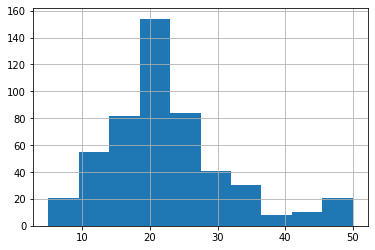

In [0]:
boston['MEDV'].hist();

From the histogram of MEDV, we could know that the most housing price is around 20.

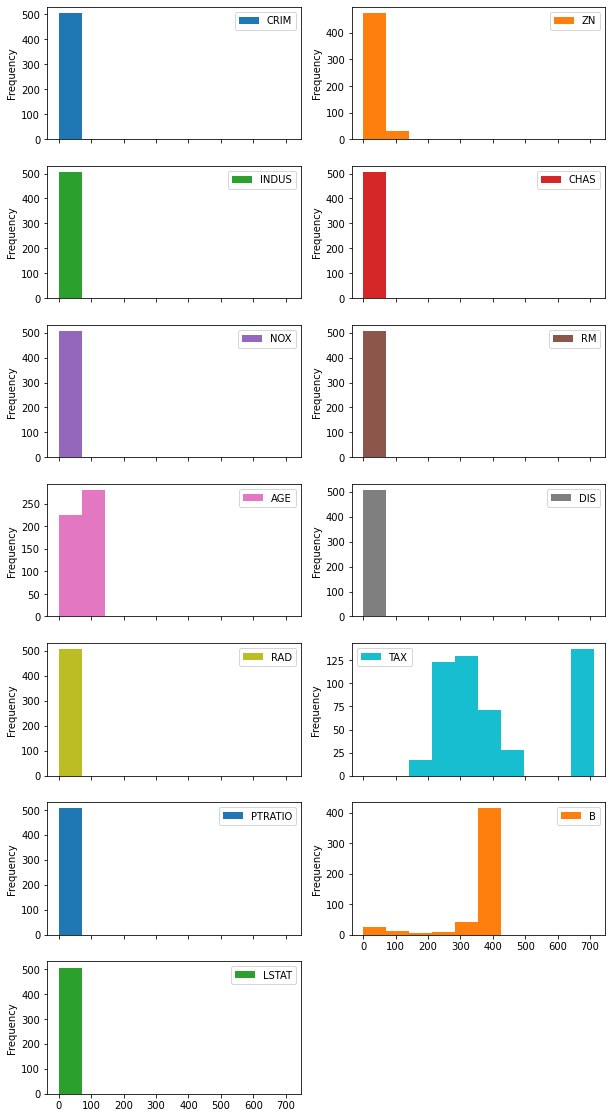

In [0]:
boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']].plot.hist(subplots=True, layout=(7, 2), figsize=(10, 20), bins=10);

Here are the histogram of all 13 features.

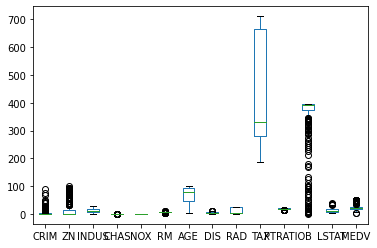

In [0]:
boston.plot.box()

In [0]:
boston['MEDV_class'] = pd.cut(x=boston['MEDV'], bins=3,
                              labels=['low', 'medium', 'high'])

In [0]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,medium
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,medium
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,medium
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,medium
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,medium
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,medium


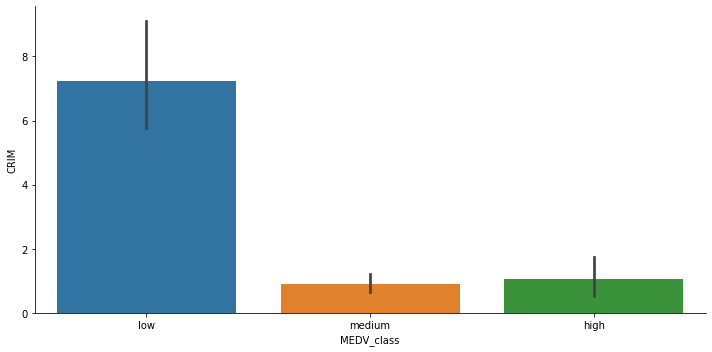

In [0]:
sns.catplot(x = "MEDV_class", y = "CRIM", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between CRIM and MEDV_class, we could know that the number of crime happended with low price is the largest.

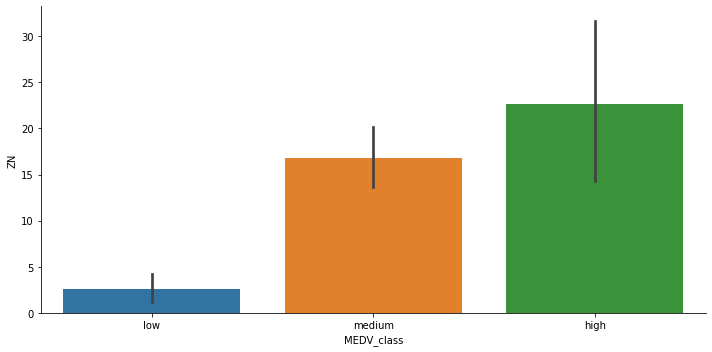

In [0]:
sns.catplot(x = "MEDV_class", y = "ZN", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between ZN and MEDV_class, we could know that the number of ZN with high price is the largest.

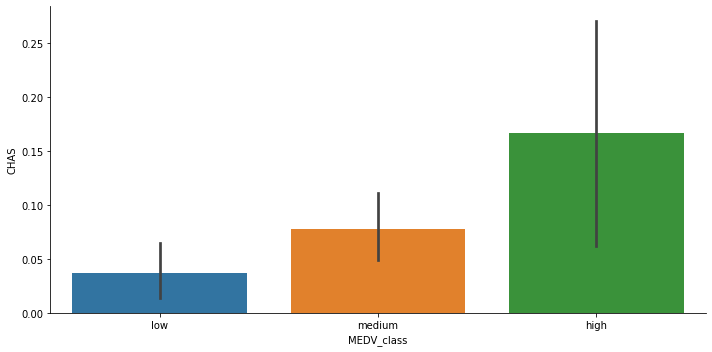

In [0]:
sns.catplot(x = "MEDV_class", y = "CHAS", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between CHAS and MEDV_class, we could know that the number of CHAS with high price is the largest.

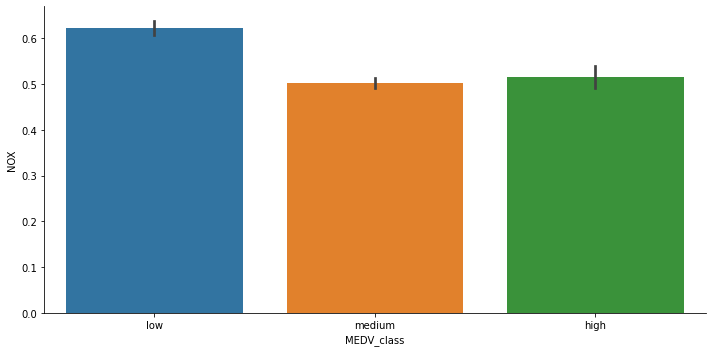

In [0]:
sns.catplot(x = "MEDV_class", y = "NOX", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between NOX and MEDV_class, we could know that the number of NOX with low price is the largest.

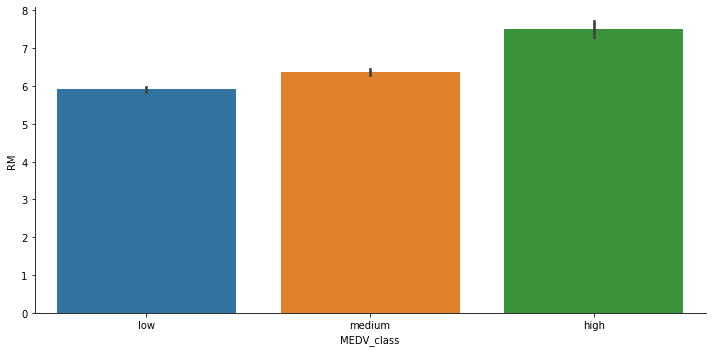

In [0]:
sns.catplot(x = "MEDV_class", y = "RM", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between RM and MEDV_class, we could know that the number of RM with high price is the largest.

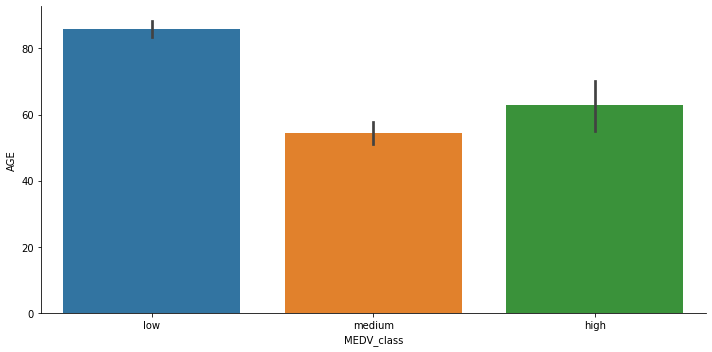

In [0]:
sns.catplot(x = "MEDV_class", y = "AGE", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between AGE and MEDV_class, we could know that the number of AGE with low price is the largest. 

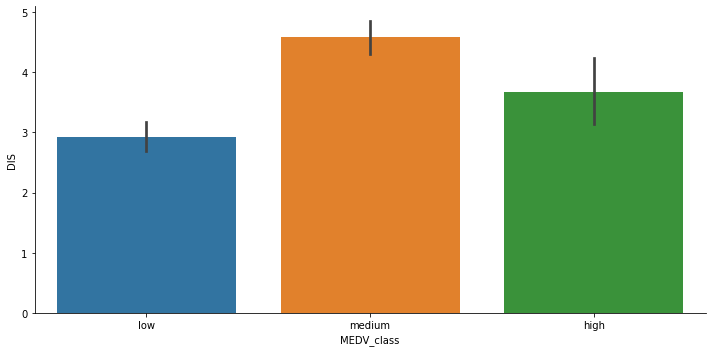

In [0]:
sns.catplot(x = "MEDV_class", y = "DIS", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between DIS and MEDV_class, we could know that the number of DIS with medium price is the largest.

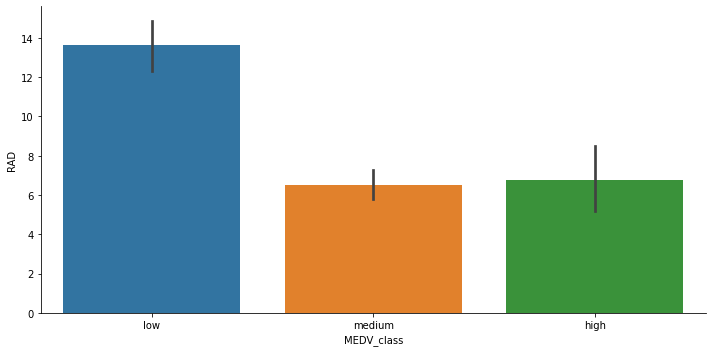

In [0]:
sns.catplot(x = "MEDV_class", y = "RAD", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between RAD and MEDV_class, we could know that the number of RAD with low price is the largest.

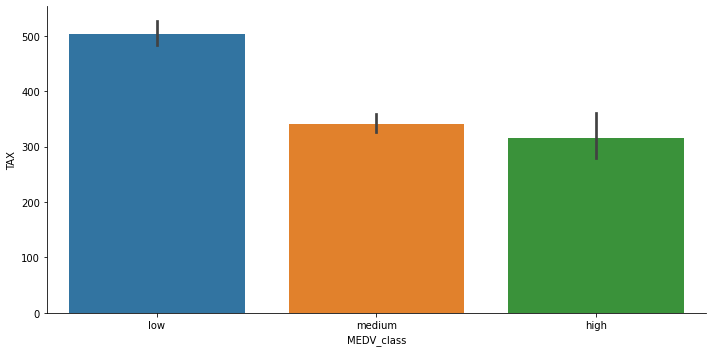

In [0]:
sns.catplot(x = "MEDV_class", y = "TAX", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between TAX and MEDV_class, we could know that the number of TAX with low price is the largest.

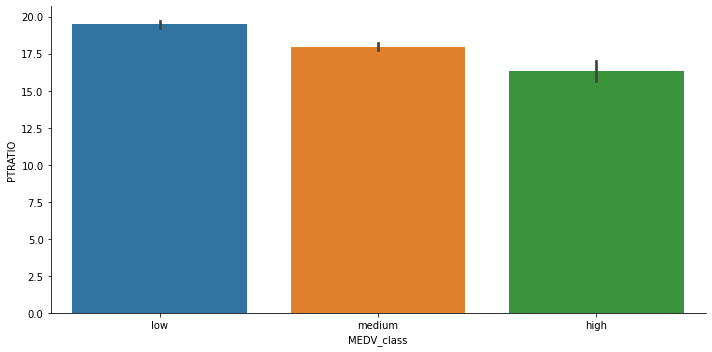

In [0]:
sns.catplot(x = "MEDV_class", y = "PTRATIO", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between PTRATIO and MEDV_class, we could know that the number of PTRATIO with low price is the largest.

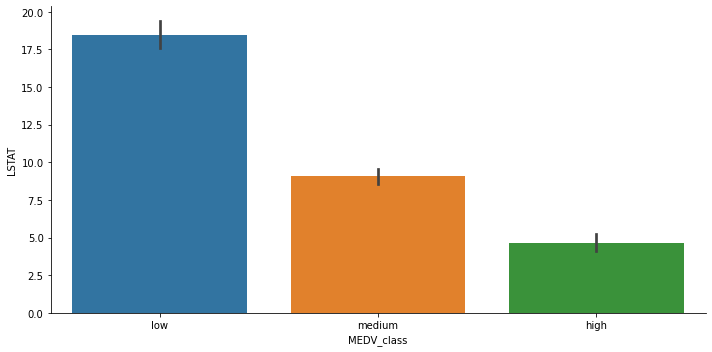

In [0]:
sns.catplot(x = "MEDV_class", y = "LSTAT", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between LSTAT and MEDV_class, we could know that the number of LSTAT with low price is the largest.

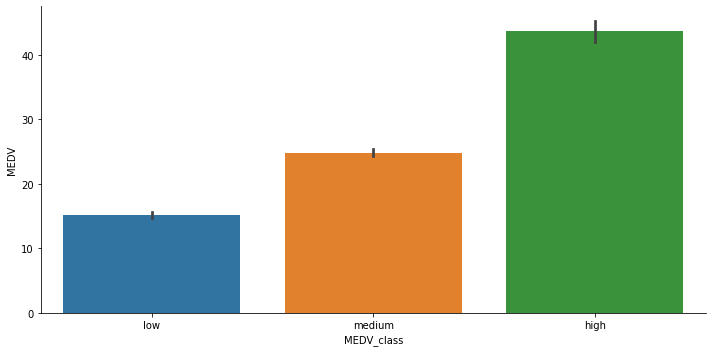

In [0]:
sns.catplot(x = "MEDV_class", y = "MEDV", data = boston, kind = "bar", height = 5, aspect = 2);

From the plot of relationship between MEDV and MEDV_class, we could know that the number of MEDV with high price is the largest.

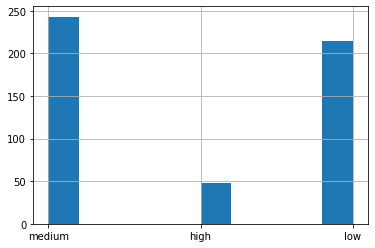

In [0]:
boston['MEDV_class'].hist();

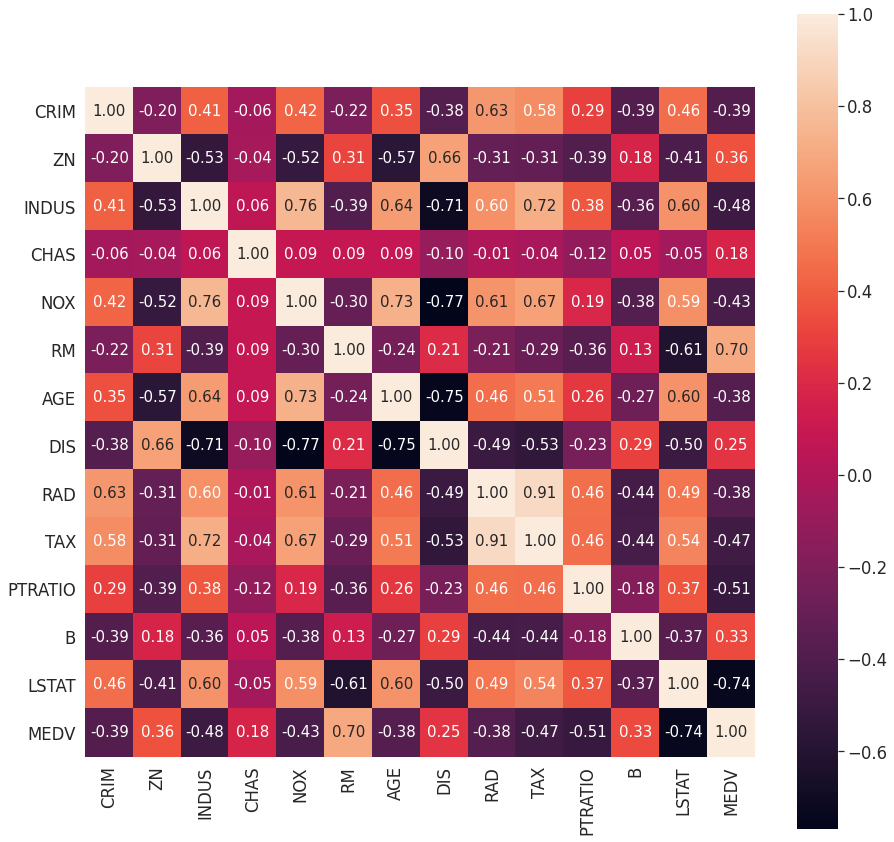

In [0]:

import numpy as np
from matplotlib.pyplot import figure

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
figure(num=None, figsize=(15, 15))
cm = np.corrcoef(boston[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols,
                )

In [0]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


## Developing a Model: Classification

In this section, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in my predictions.

In this section, I will divide the hourse price "MEDV" into three classes: low, medium, and high. And then, I will build the model for classification.

Split data

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = boston[['MEDV_class']].apply(le.fit_transform)

X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

Build and fit the model

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(X_train_std, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Make predictions and evaluate the performance

In [0]:
from sklearn import metrics
y_pred = lr.predict(X_test_std);
metrics.accuracy_score(y_test, y_pred)

0.8235294117647058

In [0]:
lr.predict_proba(X_test_std)

array([[9.60000509e-01, 8.15765926e-05, 3.99179140e-02],
       [1.24965848e-01, 1.13379707e-04, 8.74920772e-01],
       [8.10855026e-03, 8.82124923e-02, 9.03678957e-01],
       [1.30566477e-13, 9.99837194e-01, 1.62806139e-04],
       [8.65007115e-02, 1.13646781e-03, 9.12362821e-01],
       [2.17911248e-09, 9.99984065e-01, 1.59332332e-05],
       [2.63662338e-02, 9.97113201e-02, 8.73922446e-01],
       [4.37236352e-02, 7.01695992e-03, 9.49259405e-01],
       [1.79521434e-03, 1.79448719e-01, 8.18756067e-01],
       [6.55467424e-04, 1.57020450e-01, 8.42324083e-01],
       [1.56353117e-01, 1.47972189e-02, 8.28849664e-01],
       [1.08062058e-03, 2.03900880e-01, 7.95018500e-01],
       [9.70665921e-04, 2.05329864e-01, 7.93699470e-01],
       [3.33410652e-01, 5.69103121e-04, 6.66020245e-01],
       [1.94311230e-02, 1.07629894e-02, 9.69805888e-01],
       [3.46021346e-07, 9.73519857e-01, 2.64797967e-02],
       [1.98500398e-13, 9.99996079e-01, 3.92120370e-06],
       [1.06968242e-05, 8.88013

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 6  0  3]
 [ 1 39  5]
 [ 1  8 39]]


# Streamlining workflows with pipeline

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
transformer = ColumnTransformer([("norm1", SimpleImputer(missing_values=np.nan, strategy='mean'),[0,1,2,3]),
                                 ('poly', PolynomialFeatures(3),[0,1]),
                                ('scaler',MinMaxScaler(feature_range=(0,1)),[0,1,2,3])])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
logistic_model=Pipeline(steps=([('transformer', transformer), 
                                ('LR', LogisticRegression())]))
lr = logistic_model.fit(X_train, y_train.astype('int'))

from sklearn import metrics
y_pred = logistic_model.predict(X_test);
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5392156862745098

In [0]:
def return_as_it_is(X):
    return X*1

from sklearn import ensemble
from sklearn.preprocessing import FunctionTransformer
rf_model = Pipeline(steps=([('transformer', transformer),('do_nothing',FunctionTransformer(return_as_it_is)),
                            ('RF', ensemble.RandomForestClassifier())]))
rf = rf_model.fit(X_train,y_train)

from sklearn import metrics
y_pred = rf_model.predict(X_test);
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.6470588235294118

In [0]:
from sklearn.naive_bayes import GaussianNB
bayes_model = Pipeline(steps=([('transformer', transformer), 
                                ('GNB', GaussianNB())]))

bayes = bayes_model.fit(X_train, y_train)

from sklearn import metrics
y_pred = bayes.predict(X_test);
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5

## Model: Non-classification

In this section, I will use "MEDV" as the predicted variable to build the model.

Split data

In [0]:
X = X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = boston["MEDV"]

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Build and fit the model, and make the predictions.

In [0]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 29 204   9  93  23 204 126  52 124 128  29 158  46  35 138  57  77  65
  75 176  94  61 119 139 100 101  80 204 204 115  14  67  15  97  35  14
 107 159  82  49  89  81 178 204 125  75  85 110  31 204  20  16 122 182
  46 129 176 165  32 180  39 182 136  71  57  32 121 144 107  66  38 103
   6  47  90 167  87  79 150 200 111 124 105  49 204 134 190 102  81  64
 114  44 144  12 123 124  88  56 173  41 148 122  24 164 106  25 181  43
 114 114  81  85  87 154  92 151  94  86  21   0 118  93 114  84  37 161
 196  86  36 108  38 124  51  92  12  88  28  77 106  91  64  29 106 199
  76  87  88 100  63  98 146  83 184  95  74  99 195 133 134 118 147 102
  97  21 204  67 179 148  40 157  85  81  72  11 152  32  61 106 164 163
 128  15 140 137  60 184 126 106 109  68  43  34 111 123  17 189 191  88
  22 149 154  96 107  73 103  52  44 175 123  88  58  99  95 185  77  70
  31 156 204  96 134   3 162  80  87 144  79   6  36  33  49  70  83 194
 171  53  67 197  90  63  71  26 165 152  98  45 13

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(x_train, training_scores_encoded)
Y_pred = GB.predict(x_test)

Evaluate the performance

In [0]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, Y_pred)
r2=r2_score(Y_test, Y_pred)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 93.69607843137256
R2 score is -94.17887137450938


## Hyperparameter Tuning

In [0]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200]
}

In [0]:
from sklearn.model_selection import GridSearchCV
GB = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = GB, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, training_scores_encoded);

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.6min finished


In [0]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_pred_gridsearch = best_grid.predict(x_test)

In [0]:
mae_gridsearch = mean_absolute_error(y_test, y_pred_gridsearch)
r2_gridsearch=r2_score(y_test, y_pred_gridsearch)
print("The model performance for testing set from grid search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_gridsearch))
print('R2 score is {}'.format(r2_gridsearch))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_gridsearch- r2) / r2))

The model performance for testing set from grid search
--------------------------------------
mean absoulte error is 94.25490196078431
R2 score is -27678.37386443046
Improvement of 29289.15%.
